### **DSC540 Final Project**
## Team Members


1.   Wanshu Wang
2.   Kyi Moe Tun



### Heart Disease Analysis and Prediction 

#### Dataset Description
&emsp; Initially, the dataset is published by CDC as a major part of the Behavioral Risk Factor Surveillance System(BRFSS). Heart disease is a common one among Americans and about 47 percent of them prove to have 3 key risk factors for heart disease: high blood pressure, high chloresterol, and smoking. <br>
&emsp; Here, we have used the cleaned dataset from Kaggle which is reduced down from 300 columns to just 18 variables out of which 4 of them are numerical variables and the rest are categorical variables. It has also 319795 number of rows. The target variable here is a binary one showing Yes or No if a person has a heartd disease or not. <br>
&emsp; We have divided the notebook into 


*   Preliminary and Exploratory Data Analysis
*   Data Preprocessing I
*   Model Training I
*   Data Preprocessing II
*   Model Training II
*   Model Evaluation
*   Future Work







Dataset Link

https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

### Loading data into the notebook

&emsp; First, we import the essential libraries. Then we loaded the dataset from Kaggle directly using this line of code.

In [ ]:
# import
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, datasets, metrics
from sklearn import metrics
import sys
import sklearn
import matplotlib
import keras

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download kamilpytlak/personal-key-indicators-of-heart-disease

  0% 0.00/3.13M [00:00<?, ?B/s]
100% 3.13M/3.13M [00:00<00:00, 171MB/s]


In [ ]:
!unzip personal-key-indicators-of-heart-disease.zip

Archive:  personal-key-indicators-of-heart-disease.zip
  inflating: heart_2020_cleaned.csv  


### Preliminary and Exploratory Data Analysis

In [ ]:
#loading the dataset
df = pd.read_csv('heart_2020_cleaned.csv')

In [ ]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
#here we check the shape of the dataframe
df.shape

(319795, 18)

In [ ]:
#summary statistics for the dataframe
#NaN values appear due to the categorical nature of some variables
df.describe(include='all')

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795,319795.000000,319795,319795,319795,319795.00000,319795.000000,319795,319795,319795,319795,319795,319795,319795,319795.000000,319795,319795,319795
unique,2,NaN,2,2,2,NaN,NaN,2,2,13,6,4,2,5,NaN,2,2,2
top,No,NaN,No,No,No,NaN,NaN,No,Female,65-69,White,No,Yes,Very good,NaN,No,No,No
freq,292422,NaN,187887,298018,307726,NaN,NaN,275385,167805,34151,245212,269653,247957,113858,NaN,276923,308016,289976
mean,NaN,28.325399,NaN,NaN,NaN,3.37171,3.898366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.097075,NaN,NaN,NaN
std,NaN,6.356100,NaN,NaN,NaN,7.95085,7.955235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436007,NaN,NaN,NaN
min,NaN,12.020000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,24.030000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN
50%,NaN,27.340000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN
75%,NaN,31.420000,NaN,NaN,NaN,2.00000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN


In [ ]:
#there are four numerical data types
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

There seem to be four numerical columns 


*   BMI
*   Physical Health
*   Mental Health
*   SleepTime

We will use a correlation plot to check for multicollinearity.







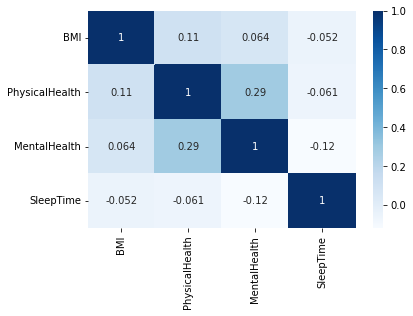

In [ ]:
cor_score = df[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']].corr()
sns.heatmap(cor_score, annot=True, cmap='Blues');

In [ ]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
#Here we extract the numerical columns of the dataset
num_col = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
num_df = df[num_col]
num_df

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,16.60,3.0,30.0,5.0
1,20.34,0.0,0.0,7.0
2,26.58,20.0,30.0,8.0
3,24.21,0.0,0.0,6.0
4,23.71,28.0,0.0,8.0
...,...,...,...,...
319790,27.41,7.0,0.0,6.0
319791,29.84,0.0,0.0,5.0
319792,24.24,0.0,0.0,6.0
319793,32.81,0.0,0.0,12.0


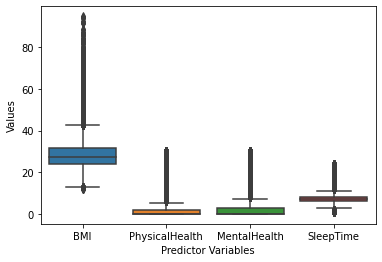

In [ ]:
#boxplots for numerical variables
sns.boxplot(data=num_df)
plt.xlabel('Predictor Variables')
plt.ylabel('Values')
plt.show()

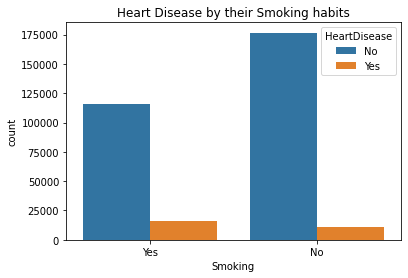

In [ ]:
sns.countplot(df['Smoking'], hue=df['HeartDisease'])
plt.title('Heart Disease by their Smoking habits');


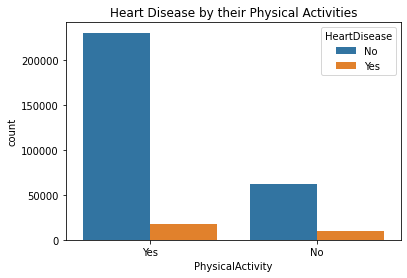

In [ ]:
sns.countplot(df['PhysicalActivity'], hue=df['HeartDisease'])
plt.title('Heart Disease by their Physical Activities');

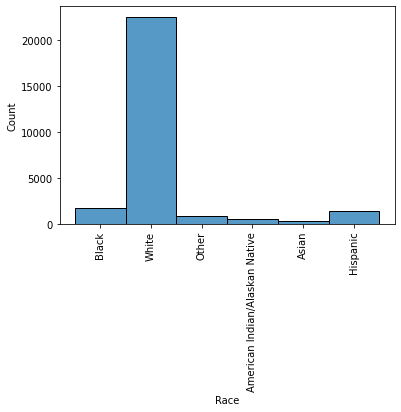

In [ ]:
sns.histplot(x=df['Race'].where(df['HeartDisease']=='Yes'))
plt.xticks(rotation=90);
plt.show();

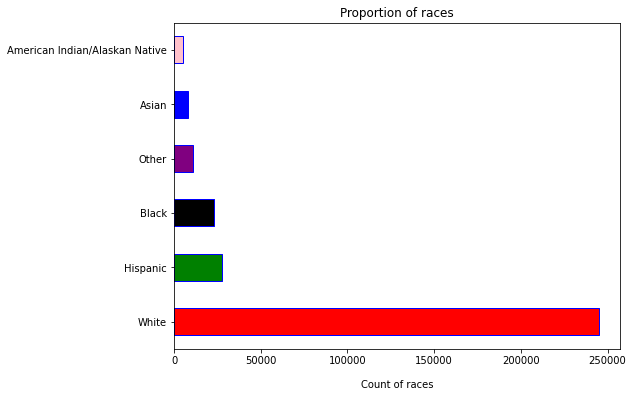

In [ ]:
#The bargraph is showing the proportion of races in the survery and 
#intrestingly, we could see that most people surveyed in this dataset are white majority and 
#the least suryved people are Red Indians and Asians as shown by the bar chart.
df['Race'].value_counts().plot(kind='barh', figsize=(8,6), 
                               color=['red', 'green', 'black', 'purple', 'blue', 'pink'],
                               edgecolor='blue')
plt.xlabel("Count of races", labelpad=14)
plt.title('Proportion of races')
plt.show()

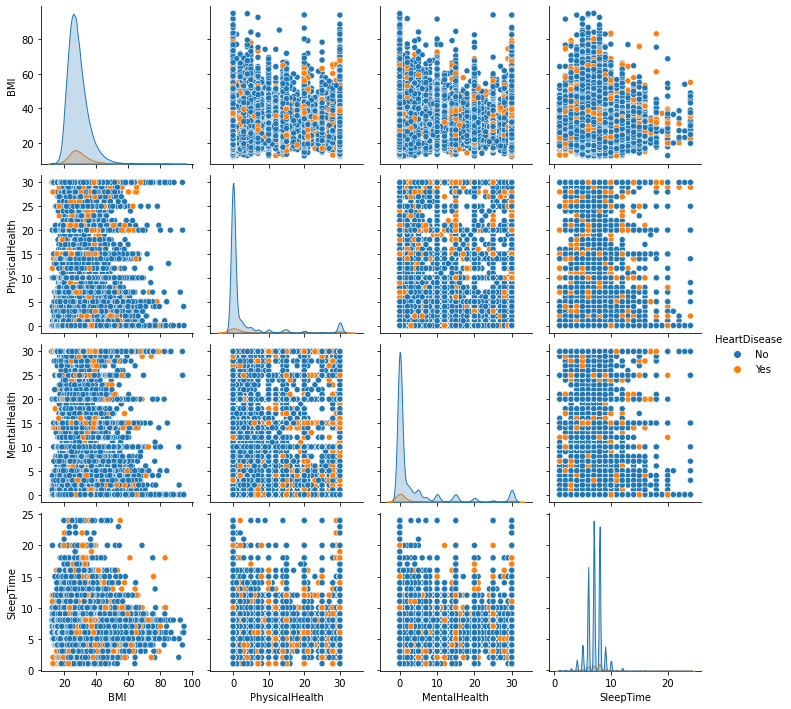

In [ ]:
sns.pairplot(df,hue='HeartDisease')

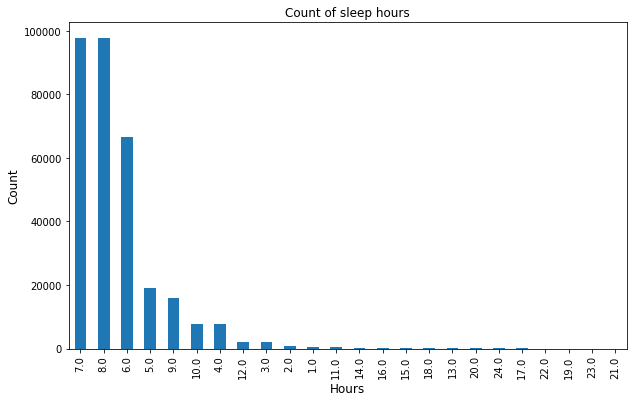

In [ ]:
#Showing the sleep hours by their count
#As we can see, most people surveyed sleep between 7-8 hours a day which is quite common.
df['SleepTime'].value_counts().plot(kind='bar', figsize=(10,6));
plt.title('Count of sleep hours')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hours', fontsize=12)
plt.show()

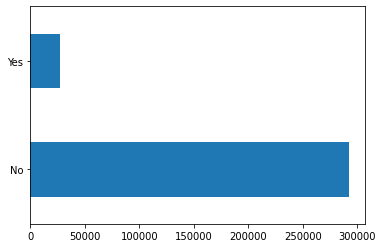

In [ ]:
#Class Distribution
a= df.HeartDisease.value_counts()
a.plot(kind='barh');

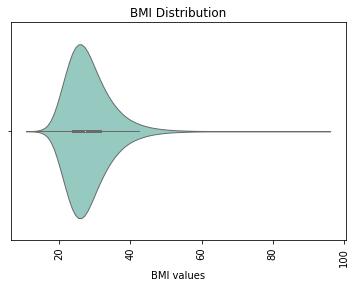

In [ ]:
sns.violinplot(df.BMI, palette="Set3", bw=.2, cut=1, linewidth=1)
plt.xticks(rotation=90)
plt.title("BMI Distribution")
plt.xlabel('BMI values')
plt.show()

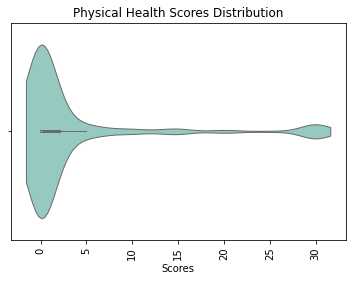

In [ ]:
sns.violinplot(df.PhysicalHealth, palette="Set3", bw=.2, cut=1, linewidth=1)
plt.xticks(rotation=90)
plt.title("Physical Health Scores Distribution")
plt.xlabel('Scores')
plt.show()

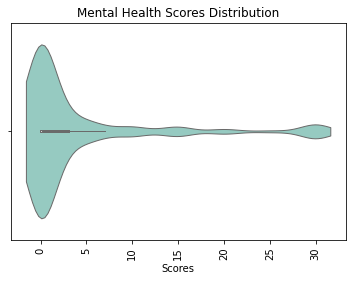

In [ ]:
sns.violinplot(df.MentalHealth, palette="Set3", bw=.2, cut=1, linewidth=1)
plt.xticks(rotation=90)
plt.title("Mental Health Scores Distribution")
plt.xlabel('Scores')
plt.show()

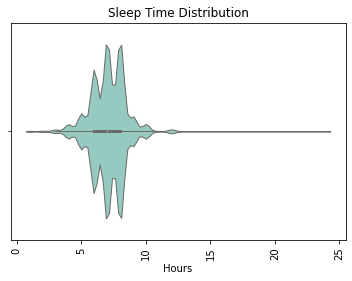

In [ ]:
sns.violinplot(df.SleepTime, palette="Set3", bw=.2, cut=1, linewidth=1)
plt.xticks(rotation=90)
plt.title("Sleep Time Distribution")
plt.xlabel('Hours')
plt.show()

### Data Preprocessing I

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [ ]:
le = LabelEncoder()
le.fit(df['HeartDisease'])
df['HeartDisease'] = le.transform(df['HeartDisease'])

In [ ]:
df_dummy = pd.get_dummies(df)

In [ ]:
df_dummy.shape

(319795, 51)

In [ ]:
df_dummy.head(10)

,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,0,16.60,3.0,30.0,5.0,0,1,1,0,1,...,0,0,0,1,0,1,1,0,0,1
1,0,20.34,0.0,0.0,7.0,1,0,1,0,0,...,0,0,0,1,1,0,1,0,1,0
2,0,26.58,20.0,30.0,8.0,0,1,1,0,1,...,1,0,0,0,0,1,1,0,1,0
3,0,24.21,0.0,0.0,6.0,1,0,1,0,1,...,0,1,0,0,1,0,1,0,0,1
4,0,23.71,28.0,0.0,8.0,1,0,1,0,1,...,0,0,0,1,1,0,1,0,1,0
5,1,28.87,6.0,0.0,12.0,0,1,1,0,1,...,1,0,0,0,1,0,1,0,1,0
6,0,21.63,15.0,0.0,4.0,1,0,1,0,1,...,1,0,0,0,0,1,1,0,0,1
7,0,31.64,5.0,0.0,9.0,0,1,1,0,1,...,0,1,0,0,0,1,1,0,1,0
8,0,26.45,0.0,0.0,5.0,1,0,1,0,1,...,1,0,0,0,1,0,0,1,1,0
9,0,40.69,0.0,0.0,10.0,1,0,1,0,1,...,0,1,0,0,1,0,1,0,1,0


#### Training and Validation and Testing datasplitting

In [ ]:
X = df_dummy.iloc[: , 1:]
y = df_dummy.HeartDisease 

In [ ]:
y

0         0
1         0
2         0
3         0
4         0
         ..
319790    1
319791    0
319792    0
319793    0
319794    0
Name: HeartDisease, Length: 319795, dtype: int64

In [ ]:
RANDOM_STATE = 42

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=RANDOM_STATE)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=RANDOM_STATE)

In [ ]:
X_val.shape

(63959, 50)

In [ ]:
X_test.shape

(63959, 50)

<AxesSubplot:>

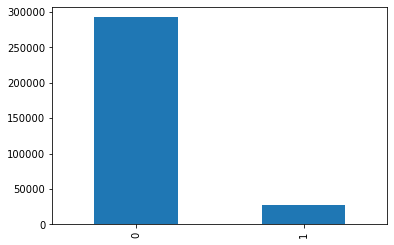

In [ ]:
y.value_counts().plot(kind='bar')

### Logistic Regression

In [ ]:
# Logistic Regression
# instantiation
logreg = linear_model.LogisticRegression()

# fit the classifier on the data
# model fitting
logreg.fit(X_train, y_train)


# output the classifiers prediction on training set
pred_train = logreg.predict(X_train)

# output the classifiers prediction on testing set
pred_val = logreg.predict(X_val)

In [ ]:
logreg_unbalanced_val_metrics = metrics.classification_report(y_val, pred_val)

In [ ]:
print(logreg_unbalanced_val_metrics)

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     58480
           1       0.53      0.11      0.18      5479

    accuracy                           0.92     63959
   macro avg       0.73      0.55      0.57     63959
weighted avg       0.89      0.92      0.89     63959



In [ ]:
logreg_unbalanced_train_metrics = metrics.classification_report(y_train, pred_train)

In [ ]:
print(logreg_unbalanced_train_metrics)

              precision    recall  f1-score   support

           0       0.92      0.99      0.96    175491
           1       0.54      0.11      0.19     16386

    accuracy                           0.92    191877
   macro avg       0.73      0.55      0.57    191877
weighted avg       0.89      0.92      0.89    191877



From the result we can see that the recall of the positive case is about 11%. That means, in all the positive cases, we only detected 11% cases correctly. In the analysis, the positive case for this dataset is very important, that is what the researchers are interested in. So we need to improve this recall. 

In [ ]:
#Class Distribution
total = df.shape[0]
a= df.HeartDisease.value_counts()
ax = a.plot(kind='bar');
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.01))

In [ ]:
print('No:', round(a[0]/total,2))
print('Yes:', round(a[1]/total,2))

### Balance Data

Due to the imbalance of this dataset, we used Synthetic Minority Oversampling Technique (SMOT) to balance the dataset. We used imblearn package and SMOTE method. The following is balanced for the two categories for heartdisease variable.

In [ ]:
import imblearn # pip install imblearn
from imblearn.over_sampling import SMOTE

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,Stroke_Yes,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,16.60,3.0,30.0,5.0,0,1,1,0,1,0,...,0,0,0,1,0,1,1,0,0,1
1,20.34,0.0,0.0,7.0,1,0,1,0,0,1,...,0,0,0,1,1,0,1,0,1,0
2,26.58,20.0,30.0,8.0,0,1,1,0,1,0,...,1,0,0,0,0,1,1,0,1,0
3,24.21,0.0,0.0,6.0,1,0,1,0,1,0,...,0,1,0,0,1,0,1,0,0,1
4,23.71,28.0,0.0,8.0,1,0,1,0,1,0,...,0,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,7.0,0.0,6.0,0,1,1,0,1,0,...,1,0,0,0,0,1,1,0,1,0
319791,29.84,0.0,0.0,5.0,0,1,1,0,1,0,...,0,0,0,1,0,1,1,0,1,0
319792,24.24,0.0,0.0,6.0,1,0,1,0,1,0,...,0,1,0,0,1,0,1,0,1,0
319793,32.81,0.0,0.0,12.0,1,0,1,0,1,0,...,0,1,0,0,1,0,1,0,1,0


In [ ]:
y

0         0
1         0
2         0
3         0
4         0
         ..
319790    1
319791    0
319792    0
319793    0
319794    0
Name: HeartDisease, Length: 319795, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [ ]:
#X_norm.shape

In [ ]:
sm = SMOTE(random_state=RANDOM_STATE)

In [ ]:
y.shape

(319795,)

In [ ]:
X_sm, y_sm = sm.fit_resample(X, y)

In [ ]:
print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')


Shape of X before SMOTE: (319795, 50)
Shape of X after SMOTE: (584844, 50)


In [ ]:
# transform the arrays to a dataframe
newcolumns = df_dummy.columns[1:]
df_balanced = pd.DataFrame(X_sm,columns = newcolumns)

In [ ]:
y_df = pd.DataFrame(y_sm)
y_df.columns = ["HeartDisease"]
y_df

,HeartDisease
0,0
1,0
2,0
3,0
4,0
...,...
584839,1
584840,1
584841,1
584842,1


In [ ]:
df_balanced = pd.concat([df_balanced, y_df],axis = 1)
df_balanced.shape

(584844, 51)

In [ ]:
df_balanced.head(10)

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,Stroke_Yes,...,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes,HeartDisease
0,16.60,3.0,30.0,5.0,0,1,1,0,1,0,...,0,0,1,0,1,1,0,0,1,0
1,20.34,0.0,0.0,7.0,1,0,1,0,0,1,...,0,0,1,1,0,1,0,1,0,0
2,26.58,20.0,30.0,8.0,0,1,1,0,1,0,...,0,0,0,0,1,1,0,1,0,0
3,24.21,0.0,0.0,6.0,1,0,1,0,1,0,...,1,0,0,1,0,1,0,0,1,0
4,23.71,28.0,0.0,8.0,1,0,1,0,1,0,...,0,0,1,1,0,1,0,1,0,0
5,28.87,6.0,0.0,12.0,0,1,1,0,1,0,...,0,0,0,1,0,1,0,1,0,1
6,21.63,15.0,0.0,4.0,1,0,1,0,1,0,...,0,0,0,0,1,1,0,0,1,0
7,31.64,5.0,0.0,9.0,0,1,1,0,1,0,...,1,0,0,0,1,1,0,1,0,0
8,26.45,0.0,0.0,5.0,1,0,1,0,1,0,...,0,0,0,1,0,0,1,1,0,0
9,40.69,0.0,0.0,10.0,1,0,1,0,1,0,...,1,0,0,1,0,1,0,1,0,0


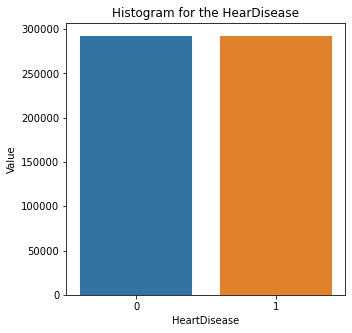

In [ ]:
heartdisease_counts = df_balanced["HeartDisease"].value_counts()

plt.figure(figsize=(5,5))
plt.title("Histogram for the HearDisease")
sns.barplot(heartdisease_counts.index, heartdisease_counts.values)
plt.xlabel("HeartDisease")
plt.ylabel("Value")
plt.show()

In [ ]:
df_balanced.to_csv("data_balanced.csv",index=True, index_label=None)

Now we got the balanced dataset. Next, we would apply the logistic regression again with this new dataset. 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.40, random_state=RANDOM_STATE)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=RANDOM_STATE)

In [ ]:
# Logistic Regression
# instantiation
logreg = linear_model.LogisticRegression()

# fit the classifier on the data
# model fitting
logreg.fit(X_train, y_train)


# output the classifiers prediction on training set
pred_train = logreg.predict(X_train)

# output the classifiers prediction on testing set
pred_val = logreg.predict(X_val)

In [ ]:
logreg_val_metrics = metrics.classification_report(y_val, pred_val)

In [ ]:
print(logreg_val_metrics)

              precision    recall  f1-score   support

           0       0.86      0.89      0.88     58510
           1       0.89      0.86      0.87     58459

    accuracy                           0.88    116969
   macro avg       0.88      0.88      0.88    116969
weighted avg       0.88      0.88      0.88    116969



In [ ]:
logreg_train_metrics = metrics.classification_report(y_train, pred_train)

In [ ]:
print(logreg_train_metrics)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88    175494
           1       0.88      0.86      0.87    175412

    accuracy                           0.88    350906
   macro avg       0.88      0.88      0.88    350906
weighted avg       0.88      0.88      0.88    350906



In [ ]:
print(metrics.classification_report(y_val, pred_val))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88     58510
           1       0.89      0.86      0.87     58459

    accuracy                           0.88    116969
   macro avg       0.88      0.88      0.88    116969
weighted avg       0.88      0.88      0.88    116969



In [ ]:
print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88    175494
           1       0.88      0.86      0.87    175412

    accuracy                           0.88    350906
   macro avg       0.88      0.88      0.88    350906
weighted avg       0.88      0.88      0.88    350906



In [ ]:
#metrics.ConfusionMatrixDisplay.from_predictions(y_val, pred_val)

In [ ]:
def plot_feature_importances(model, df):
    n_features = df.shape[1]
    df_colnames= df.columns
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), df_colnames)
    plt.xlabel("Feature importance")
#     plt.ylabel("Feature")
    plt.ylim(-1, n_features)

In [ ]:
def fun_print_scores(fitted_estimator, X, y_true):
    '''
    Takes as input fitted model, X, and target labels.
    Prints scores
    '''
    y_pred = fitted_estimator.predict(X)
    print("Accuracy.....: {:.3f}".format(metrics.accuracy_score(y_true, y_pred)))
    print("Bal. Accuracy: {:.3f}".format(metrics.balanced_accuracy_score(y_true, y_pred)))
    print("F-1 Score....: {:.3f}".format(metrics.f1_score(y_true, y_pred, average="binary")))
    print("Recall.......: {:.3f}".format(metrics.recall_score(y_true, y_pred, pos_label=1)))
    print("Precision....: {:.3f}".format(metrics.precision_score(y_true, y_pred, pos_label=1)))
    print("Specificity..: {:.3f}".format(metrics.recall_score(y_true, y_pred, pos_label=0)))
    
    metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred, normalize='all')

### Decision Tree

In [ ]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(random_state=RANDOM_STATE)

dt.fit(X_train,y_train)

#Accuracy Train
pred_train = dt.predict(X_train)
print("Accuracy Score (Train): ", metrics.accuracy_score(y_true = y_train, y_pred = pred_train))

#Accuracy Val
pred = dt.predict(X_val)
print("Accuracy Score (Val): ", metrics.accuracy_score(y_true = y_val, y_pred = pred))

Accuracy Score (Train):  0.9984782249377326
Accuracy Score (Val):  0.9089331361300858


In [ ]:
dt_val_metrics = metrics.classification_report(y_val, pred_val)

In [ ]:
print(dt_val_metrics)

              precision    recall  f1-score   support

           0       0.92      0.95      0.94     58510
           1       0.95      0.92      0.94     58459

    accuracy                           0.94    116969
   macro avg       0.94      0.94      0.94    116969
weighted avg       0.94      0.94      0.94    116969



In [ ]:
dt_train_metrics = metrics.classification_report(y_train, pred_train)

In [ ]:
print(dt_train_metrics)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    175494
           1       1.00      1.00      1.00    175412

    accuracy                           1.00    350906
   macro avg       1.00      1.00      1.00    350906
weighted avg       1.00      1.00      1.00    350906



In [ ]:
#metrics.ConfusionMatrixDisplay.from_predictions(y_true=y_val, y_pred=pred, normalize='all', )

In [ ]:
#fun_print_scores(dt, X_val, y_val)

There is an overfitting problem. Therefore, we applied the grid search cross validation to tune the hyperparameters to get the best model

In [ ]:
from sklearn import model_selection

In [ ]:
params = {}
min_samples_splits = [10, 50, 100, 200]
max_depths = [2,5,10,15]
n_estimators = [100, 500]
params = {
    "min_samples_split": min_samples_splits,
    "max_depth": max_depths
         }

In [ ]:
grid_dt = model_selection.GridSearchCV(estimator=dt, param_grid=params, scoring="f1", n_jobs=-1)
grid_dt

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 15],
                         'min_samples_split': [10, 50, 100, 200]},
             scoring='f1')

In [ ]:
grid_dt.fit(X_train, y_train)


GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 15],
                         'min_samples_split': [10, 50, 100, 200]},
             scoring='f1')

In [ ]:
dt_best = grid_dt.best_params_
dt_best

{'max_depth': 15, 'min_samples_split': 10}

In [ ]:
dt_best_model = grid_dt.best_estimator_

In [ ]:
pred_val = dt_best_model.predict(X_val)

In [ ]:
pred_train = dt_best_model.predict(X_train)

In [ ]:
#fun_print_scores(grid.best_estimator_, X_val, y_val)

In [ ]:
grid_dt_val_metrics = metrics.classification_report(y_val, pred_val)

In [ ]:
print(grid_dt_val_metrics)

              precision    recall  f1-score   support

           0       0.85      0.86      0.86     58510
           1       0.86      0.85      0.85     58459

    accuracy                           0.85    116969
   macro avg       0.85      0.85      0.85    116969
weighted avg       0.85      0.85      0.85    116969



In [ ]:
grid_dt_train_metrics = metrics.classification_report(y_train, pred_train)

In [ ]:
print(grid_dt_train_metrics)

              precision    recall  f1-score   support

           0       0.86      0.87      0.87    175494
           1       0.87      0.86      0.87    175412

    accuracy                           0.87    350906
   macro avg       0.87      0.87      0.87    350906
weighted avg       0.87      0.87      0.87    350906



### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
#fit the model
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
#Make predictions
pred_val = rf.predict(X_val)

In [ ]:
#Make predictions for training data
pred_train = rf.predict(X_train)

In [ ]:
#metrics.ConfusionMatrixDisplay.from_predictions(y_val, pred_val);

In [ ]:
rf_val_metrics = metrics.classification_report(y_val, pred_val)

In [ ]:
print(rf_val_metrics) # metrics for validation data

              precision    recall  f1-score   support

           0       0.92      0.95      0.94     58510
           1       0.95      0.92      0.94     58459

    accuracy                           0.94    116969
   macro avg       0.94      0.94      0.94    116969
weighted avg       0.94      0.94      0.94    116969



In [ ]:
rf_train_metrics = metrics.classification_report(y_train, pred_train)

In [ ]:
print(rf_train_metrics) # metrics for training data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    175494
           1       1.00      1.00      1.00    175412

    accuracy                           1.00    350906
   macro avg       1.00      1.00      1.00    350906
weighted avg       1.00      1.00      1.00    350906



This is an overfitting problem so we adjust the max_depth value. 

#### Adjust the max_depth 

In [ ]:
rf_depth = RandomForestClassifier(max_depth = 10)

In [ ]:
#fit the model
rf_depth.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [ ]:
#Make predictions
pred_val = rf_depth.predict(X_val)

In [ ]:
pred_train = rf_depth.predict(X_train)

In [ ]:
rf_depth_val_metrics = metrics.classification_report(y_val, pred_val)

In [ ]:
print(rf_depth_val_metrics) # metrics for validation data

              precision    recall  f1-score   support

           0       0.83      0.85      0.84     58510
           1       0.84      0.83      0.84     58459

    accuracy                           0.84    116969
   macro avg       0.84      0.84      0.84    116969
weighted avg       0.84      0.84      0.84    116969



In [ ]:
rf_depth_train_metrics = metrics.classification_report(y_train, pred_train)

In [ ]:
print(rf_depth_train_metrics) # metrics for training data

              precision    recall  f1-score   support

           0       0.83      0.85      0.84    175494
           1       0.85      0.83      0.84    175412

    accuracy                           0.84    350906
   macro avg       0.84      0.84      0.84    350906
weighted avg       0.84      0.84      0.84    350906



Tuning Hyperparameters for Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=RANDOM_STATE)
params = {}
min_samples_splits = [10, 50, 100, 200]
max_depths = [2,5,10,15]
n_estimators = [100, 500]
params = {
    "min_samples_split": min_samples_splits,
    "max_depth": max_depths, 
    "n_estimators": n_estimators
         }

In [ ]:
from sklearn import model_selection

In [ ]:
grid.fit(X_train, y_train)
grid.best_params_

{'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 500}

In [ ]:
grid_rf = grid

In [ ]:
grid_rf.best_params_

{'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 500}

In [ ]:
pred_val = grid_rf.best_estimator_.predict(X_val) # predict with validation data

In [ ]:
pred_train = grid_rf.best_estimator_.predict(X_train) # predict with training data

In [ ]:
grid_rf_val_metrics = metrics.classification_report(y_val, pred_val)

In [ ]:
print(grid_rf_val_metrics) # metrics for validation data

              precision    recall  f1-score   support

           0       0.87      0.87      0.87     58510
           1       0.87      0.88      0.87     58459

    accuracy                           0.87    116969
   macro avg       0.87      0.87      0.87    116969
weighted avg       0.87      0.87      0.87    116969



In [ ]:
grid_rf_train_metrics = metrics.classification_report(y_train, pred_train)

In [ ]:
print(grid_rf_train_metrics) # metrics for training data

              precision    recall  f1-score   support

           0       0.88      0.87      0.88    175494
           1       0.88      0.88      0.88    175412

    accuracy                           0.88    350906
   macro avg       0.88      0.88      0.88    350906
weighted avg       0.88      0.88      0.88    350906



In [ ]:
#fun_print_scores(grid.best_estimator_, X_val, y_val)

In [ ]:
#fun_print_scores(grid.best_estimator_, X_train, y_train)

In [ ]:
#plt.figure(figsize=[5,10])
#plot_feature_importances(grid.best_estimator_, df=X_train)

### Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ad = AdaBoostClassifier()

In [ ]:
ad.fit(X_train, y_train)

AdaBoostClassifier()

In [ ]:
pred_val = ad.predict(X_val)

In [ ]:
pred_train = ad.predict(X_train)

In [ ]:
ad_val_metrics = metrics.classification_report(y_val, pred_val)

In [ ]:
print(ad_val_metrics)

              precision    recall  f1-score   support

           0       0.87      0.86      0.87     58510
           1       0.86      0.87      0.87     58459

    accuracy                           0.87    116969
   macro avg       0.87      0.87      0.87    116969
weighted avg       0.87      0.87      0.87    116969



In [ ]:
ad_train_metrics = metrics.classification_report(y_train, pred_train)

In [ ]:
print(ad_train_metrics)

              precision    recall  f1-score   support

           0       0.88      0.86      0.87    175494
           1       0.86      0.88      0.87    175412

    accuracy                           0.87    350906
   macro avg       0.87      0.87      0.87    350906
weighted avg       0.87      0.87      0.87    350906



### Gradient Boosting Machine

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb = GradientBoostingClassifier(random_state=RANDOM_STATE)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
pred_val = gb.predict(X_val)

In [ ]:
pred_train = gb.predict(X_train)

In [ ]:
gb_val_metrics = metrics.classification_report(y_val, pred_val)

In [ ]:
print(gb_val_metrics)

              precision    recall  f1-score   support

           0       0.88      0.86      0.87     58510
           1       0.86      0.88      0.87     58459

    accuracy                           0.87    116969
   macro avg       0.87      0.87      0.87    116969
weighted avg       0.87      0.87      0.87    116969



In [ ]:
gb_train_metrics = metrics.classification_report(y_train, pred_train)

In [ ]:
print(gb_train_metrics)

              precision    recall  f1-score   support

           0       0.88      0.85      0.87    175494
           1       0.86      0.88      0.87    175412

    accuracy                           0.87    350906
   macro avg       0.87      0.87      0.87    350906
weighted avg       0.87      0.87      0.87    350906



In [ ]:
#fun_print_scores(gb, X_train, y_train)

In [ ]:
#fun_print_scores(gb, X_val, y_val)

### PCA 

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=None)

pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

[0.53260779 0.78582657 0.96969978 0.98011613 0.98254244 0.9846403
 0.98623342 0.98746639 0.98864232 0.98969732 0.99064798 0.99151771
 0.99226275 0.99299347 0.9935169  0.99402124 0.99446661 0.99489671
 0.99531825 0.99571174 0.9960917  0.99644379 0.99673108 0.99696524
 0.99719535 0.9974171  0.99761061 0.99779263 0.9979676  0.99813676
 0.9982995  0.99845898 0.99860863 0.99874277 0.99887439 0.99900481
 0.99913094 0.99924973 0.99935784 0.99945195 0.99954166 0.99962608
 0.99970325 0.99977991 0.99983207 0.99988033 0.99991992 0.99995474
 0.99998152 1.        ]


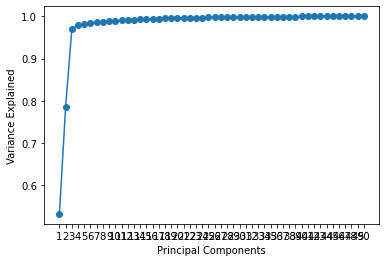

In [ ]:
print(pca.explained_variance_ratio_.cumsum())
plt.plot(pca.explained_variance_ratio_.cumsum(), '-o');
plt.xticks(ticks= range(X_train_pca.shape[1]), labels=[i+1 for i in range(X_train_pca.shape[1])])
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show()

Choose 3 components for PCA.

In [ ]:
X_train_pca2 = X_train_pca[:, 0:3]
X_val_pca2 = X_val_pca[:, 0:3]
X_test_pca2 = X_test_pca[:, 0:3]

#### PCA for Random Forest

We apply PCA for the best model of Random Forest, which is so far with the best performance. 

In [ ]:
# ( Parameters for the BEST Random Forest model)'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 500

In [ ]:
rf = RandomForestClassifier(max_depth=15,min_samples_split=10,n_estimators=500)

In [ ]:
#fit the model with pca data
rf.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=15, min_samples_split=10, n_estimators=500)

In [ ]:
#Make predictions
pred_val = rf.predict(X_val_pca)

In [ ]:
#Make predictions for training data
pred_train = rf.predict(X_train_pca)

In [ ]:
pca_rf_val_metrics = metrics.classification_report(y_val, pred_val)

In [ ]:
print(pca_rf_val_metrics)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92     58510
           1       0.97      0.87      0.91     58459

    accuracy                           0.92    116969
   macro avg       0.92      0.92      0.92    116969
weighted avg       0.92      0.92      0.92    116969



In [ ]:
pca_rf_train_metrics = metrics.classification_report(y_train, pred_train)

In [ ]:
print(pca_rf_train_metrics)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93    175494
           1       0.97      0.88      0.92    175412

    accuracy                           0.93    350906
   macro avg       0.93      0.93      0.93    350906
weighted avg       0.93      0.93      0.93    350906



This is the best model for our classification problem. 

In [ ]:
#Make predictions for tesing data
pred_test = rf.predict(X_test_pca)

In [ ]:
pca_rf_test_metrics = metrics.classification_report(y_test, pred_test)

In [ ]:
print(pca_rf_test_metrics)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92     58418
           1       0.97      0.87      0.92     58551

    accuracy                           0.92    116969
   macro avg       0.92      0.92      0.92    116969
weighted avg       0.92      0.92      0.92    116969



### Neural Networks

In [ ]:
#Libraries for neural networks
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

In [ ]:
#we have applied SMOTE again for the neural networks
#there is no validation set here
import imblearn # pip install imblearn
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state=11)
X_sm, y_sm = sm.fit_resample(X, y)

In [ ]:
print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

Shape of X before SMOTE: (319795, 50)
Shape of X after SMOTE: (584844, 50)


In [ ]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_sm, y_sm, 
                                                                    #stratify=y_sm, 
                                                                    random_state=42, 
                                                                    test_size = 0.3)

In [ ]:
X_train.shape

(255836, 50)

In [ ]:
#Neural Network 1
# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=50, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation='sigmoid'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 16)                816       
                                                                 
 dropout_12 (Dropout)        (None, 16)                0         
                                                                 
 dense_20 (Dense)            (None, 8)                 136       
                                                                 
 dropout_13 (Dropout)        (None, 8)                 0         
                                                                 
 dense_21 (Dense)            (None, 2)                 18        
                                                                 
Total params: 970
Trainable params: 970
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

In [ ]:
# fit the model to the training data
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=200)

Epoch 1/30
1280/1280 [==============================] - 11s 9ms/step - loss: 0.2790 - accuracy: 0.9144 - val_loss: 0.2607 - val_accuracy: 0.9144
Epoch 2/30
1280/1280 [==============================] - 10s 8ms/step - loss: 0.2646 - accuracy: 0.9144 - val_loss: 0.2604 - val_accuracy: 0.9144
Epoch 3/30
1280/1280 [==============================] - 10s 8ms/step - loss: 0.2606 - accuracy: 0.9144 - val_loss: 0.2499 - val_accuracy: 0.9144
Epoch 4/30
1280/1280 [==============================] - 13s 10ms/step - loss: 0.2589 - accuracy: 0.9144 - val_loss: 0.2494 - val_accuracy: 0.9144
Epoch 5/30
1280/1280 [==============================] - 13s 10ms/step - loss: 0.2578 - accuracy: 0.9144 - val_loss: 0.2614 - val_accuracy: 0.9144
Epoch 6/30
1280/1280 [==============================] - 10s 8ms/step - loss: 0.2570 - accuracy: 0.9144 - val_loss: 0.2472 - val_accuracy: 0.9144
Epoch 7/30
1280/1280 [==============================] - 13s 10ms/step - loss: 0.2563 - accuracy: 0.9144 - val_loss: 0.2483 - val

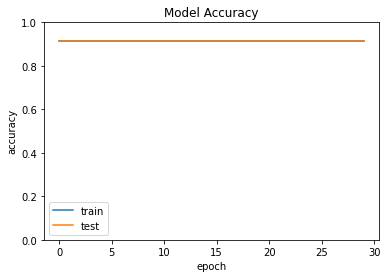

In [ ]:
import matplotlib.pyplot as plt
# Model accuracy
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.plot(history.history['val_accuracy'])
plt.ylim((0, 1)) 
plt.legend(['train', 'test'])


plt.show()

In [ ]:
#Neural Network 2
# define a new keras model for binary classification
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=50, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 16)                816       
                                                                 
 dropout_16 (Dropout)        (None, 16)                0         
                                                                 
 dense_26 (Dense)            (None, 8)                 136       
                                                                 
 dropout_17 (Dropout)        (None, 8)                 0         
                                                                 
 dense_27 (Dense)            (None, 1)                 9         
                                                                 
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history_2=binary_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=100)

Epoch 1/30
4094/4094 [==============================] - 14s 3ms/step - loss: 0.3718 - accuracy: 0.8455 - val_loss: 0.2663 - val_accuracy: 0.8938
Epoch 2/30
4094/4094 [==============================] - 12s 3ms/step - loss: 0.2908 - accuracy: 0.8837 - val_loss: 0.2444 - val_accuracy: 0.8964
Epoch 3/30
4094/4094 [==============================] - 12s 3ms/step - loss: 0.2740 - accuracy: 0.8895 - val_loss: 0.2289 - val_accuracy: 0.9093
Epoch 4/30
4094/4094 [==============================] - 12s 3ms/step - loss: 0.2678 - accuracy: 0.8912 - val_loss: 0.2272 - val_accuracy: 0.9065
Epoch 5/30
4094/4094 [==============================] - 11s 3ms/step - loss: 0.2648 - accuracy: 0.8919 - val_loss: 0.2327 - val_accuracy: 0.8968
Epoch 6/30
4094/4094 [==============================] - 12s 3ms/step - loss: 0.2642 - accuracy: 0.8915 - val_loss: 0.2474 - val_accuracy: 0.8899
Epoch 7/30
4094/4094 [==============================] - 16s 4ms/step - loss: 0.2635 - accuracy: 0.8924 - val_loss: 0.2542 - val_ac

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
# generate classification report using predictions for binary model 
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(y_test, binary_pred))
print(classification_report(y_test, binary_pred))

Results for Binary Model
0.9084432386836436
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     87576
           1       0.93      0.88      0.91     87878

    accuracy                           0.91    175454
   macro avg       0.91      0.91      0.91    175454
weighted avg       0.91      0.91      0.91    175454



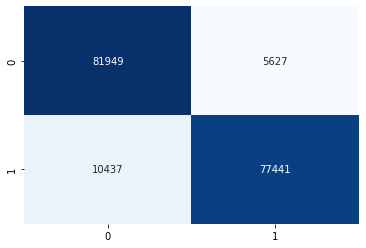

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, binary_pred)
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)
#accuracy score

In [ ]:
#Neural network 3 with different epochs and batch sizes
history_3=binary_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=30)

Epoch 1/50
13647/13647 [==============================] - 38s 3ms/step - loss: 0.3117 - accuracy: 0.8771 - val_loss: 0.2520 - val_accuracy: 0.8966
Epoch 2/50
13647/13647 [==============================] - 40s 3ms/step - loss: 0.3188 - accuracy: 0.8732 - val_loss: 0.2807 - val_accuracy: 0.8860
Epoch 3/50
13647/13647 [==============================] - 38s 3ms/step - loss: 0.3161 - accuracy: 0.8712 - val_loss: 0.2839 - val_accuracy: 0.8867
Epoch 4/50
13647/13647 [==============================] - 37s 3ms/step - loss: 0.3180 - accuracy: 0.8702 - val_loss: 0.3281 - val_accuracy: 0.8672
Epoch 5/50
13647/13647 [==============================] - 40s 3ms/step - loss: 0.3161 - accuracy: 0.8716 - val_loss: 0.2556 - val_accuracy: 0.8970
Epoch 6/50
13647/13647 [==============================] - 42s 3ms/step - loss: 0.3152 - accuracy: 0.8715 - val_loss: 0.2585 - val_accuracy: 0.8958
Epoch 7/50
13647/13647 [==============================] - 38s 3ms/step - loss: 0.3173 - accuracy: 0.8713 - val_loss: 0

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
# generate classification report using predictions for binary model 
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(y_test, binary_pred))
print(classification_report(y_test, binary_pred))

Results for Binary Model
0.8887571671207268
              precision    recall  f1-score   support

           0       0.85      0.95      0.89     87576
           1       0.94      0.83      0.88     87878

    accuracy                           0.89    175454
   macro avg       0.89      0.89      0.89    175454
weighted avg       0.89      0.89      0.89    175454



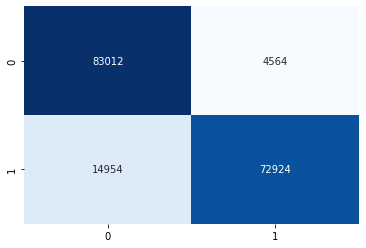

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, binary_pred)
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)
#accuracy score

# Evaluation

The following talbe is with the metrics for all methods we applied in this work. 

| Algorithms | Validation Accuracy | | 
| --- | --- | --- |
| Decision Tree CV| 0.85 | 
| Random Forest CV| 0.87 |
| Random Forest with PCA | 0.92|
| Gradient Boosting | 0.87 |
| AdaBoost | 0.87 |
| Neural Networks 1 | 0.91 |
| Neural Networks 2| 0.91 |
| Neural Networks 3| 0.89 |



|Test Accuracy for the Best Model||
| --- | --- | 
| Random Forest with PCA | 0.92 |

The metrics for the best model are as below. 

In [ ]:
print(pca_rf_test_metrics)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92     58418
           1       0.97      0.87      0.92     58551

    accuracy                           0.92    116969
   macro avg       0.92      0.92      0.92    116969
weighted avg       0.92      0.92      0.92    116969



# Future Work
&emsp; There are some problems with the dataset, particularly it having an imbalance between positive and negative classes. There are more Nos to the Heart Disease which makes positive cases less number of count. As an ideal dataset, it is required to have at least a third of one particular case and two thirds of the other case or best to have a 50/50 proportion of binary classes. Here we have used oversampling method to solve this problem which is applied using SMOTE. <br>
&emsp; The other thing is we could add more numerical variables to the dataset to ensure the model is not influenced by only categorical variables.